In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline

In [2]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
pd.set_option('display.max_columns',50)
pd.set_option('max_colwidth', None)

## EDA and dataset description

Dataset has 1190 observations and 12 variables. This is a medical problem, our target variable is binary. In such problems we want to focus mostly on recall, as identifying people at risk is our priority. It doesn't mean that we should completely forget about other metrics, this is why in our process except for recall we will also observe ROC-AUC score as our variable describing overall predictive power.

<b>Independent variables </b>  

age - age of patient (Numerical)  

sex - sex of patient:
- 0: female
- 1: male  

chest pain type - type of chest pain:  
 - 1 typical
 - 2 typical angina
 - 3 non-anginal pain
 - 4 asymptomatic  
 
resting bp s - level of blood pressure at resting mode in mm/H (Numerical)  

cholesterol - cholestrol in mg/dl (Numerical)  

fasting blood sugar - blood sugar levels on fasting > 120 mg/dl:
- 1: true 
- 0: false

resting ecg - result of electrocardiogram while at rest are represented in 3 distinct values:   
 - 0 : Normal 
 - 1: Abnormality in ST-T wave 
 - 2: Left ventricular hypertrophy  
 
max heart rate - maximum heart rate  (Numerical)  

exercise angina - angina induced by exercise:  
- 1: yes
- 0: no 

oldpeak - exercise induced ST-depression in comparison with the state of rest (Numerical)  

ST slope - ST segment measured in terms of slope during peak exercise: 
- 0: Normal 
- 1: Upsloping 
- 2: Flat 
- 3: Downsloping  

<b>Target variable</b>:  

target - Heart Risk:
 - 1: heart disease
 - 0: normal
 
 
Let's look closer at our data.

In [3]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


Variable:  age 

count    1190.000000
mean       53.720168
std         9.358203
min        28.000000
25%        47.000000
50%        54.000000
75%        60.000000
max        77.000000
Name: age, dtype: float64


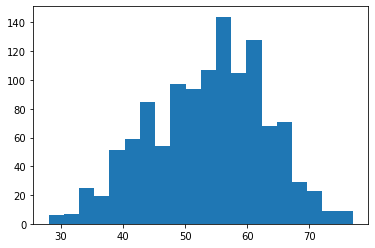





Variable:  sex 

count    1190.000000
mean        0.763866
std         0.424884
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64


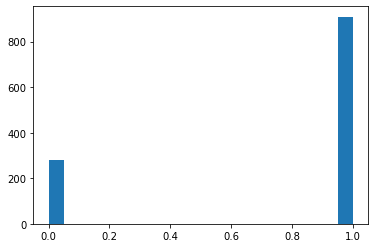





Variable:  chest pain type 

count    1190.000000
mean        3.232773
std         0.935480
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: chest pain type, dtype: float64


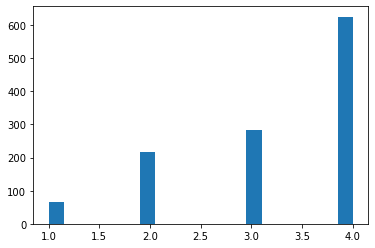





Variable:  resting bp s 

count    1190.000000
mean      132.153782
std        18.368823
min         0.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: resting bp s, dtype: float64


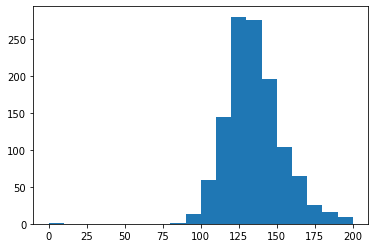





Variable:  cholesterol 

count    1190.000000
mean      210.363866
std       101.420489
min         0.000000
25%       188.000000
50%       229.000000
75%       269.750000
max       603.000000
Name: cholesterol, dtype: float64


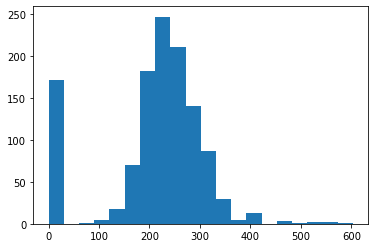





Variable:  fasting blood sugar 

count    1190.000000
mean        0.213445
std         0.409912
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fasting blood sugar, dtype: float64


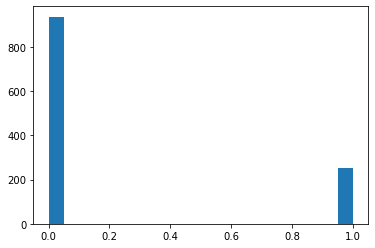





Variable:  resting ecg 

count    1190.000000
mean        0.698319
std         0.870359
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         2.000000
Name: resting ecg, dtype: float64


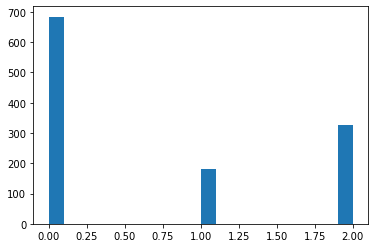





Variable:  max heart rate 

count    1190.000000
mean      139.732773
std        25.517636
min        60.000000
25%       121.000000
50%       140.500000
75%       160.000000
max       202.000000
Name: max heart rate, dtype: float64


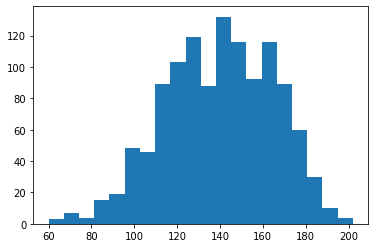





Variable:  exercise angina 

count    1190.000000
mean        0.387395
std         0.487360
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: exercise angina, dtype: float64


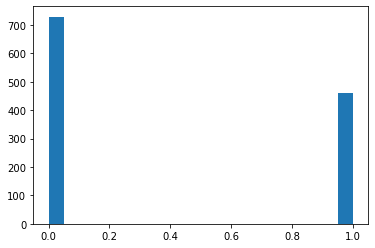





Variable:  oldpeak 

count    1190.000000
mean        0.922773
std         1.086337
min        -2.600000
25%         0.000000
50%         0.600000
75%         1.600000
max         6.200000
Name: oldpeak, dtype: float64


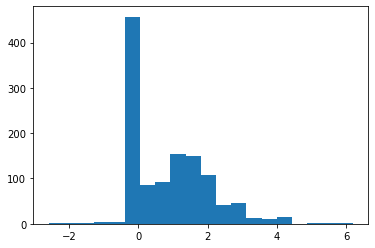





Variable:  ST slope 

count    1190.000000
mean        1.624370
std         0.610459
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: ST slope, dtype: float64


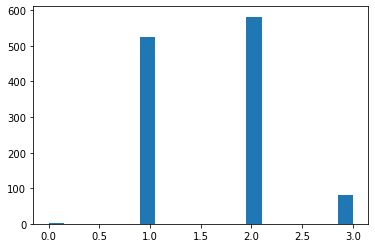





Variable:  target 

count    1190.000000
mean        0.528571
std         0.499393
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64


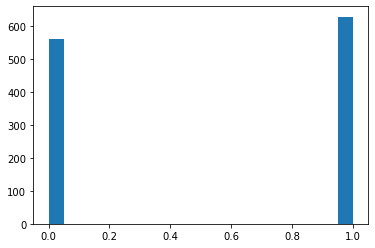

In [6]:
for col in df.columns:
    print("Variable: ",col, "\n")
    print(df[col].describe())
    plt.hist(df[col], bins=20)
    plt.show()
    print('\n\n\n')

In [7]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

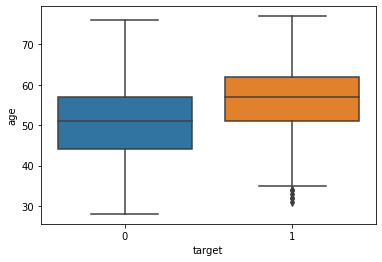

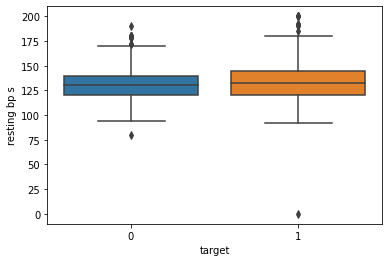

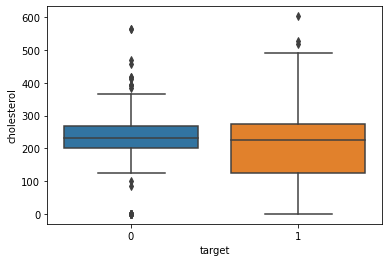

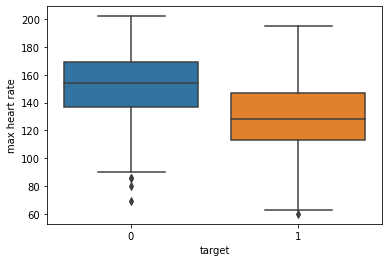

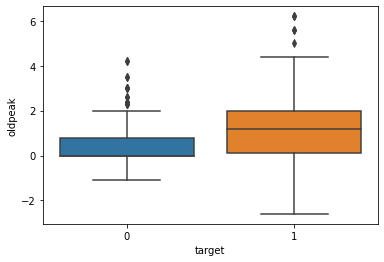

In [8]:
for col in ['age', 'resting bp s', 'cholesterol',
       'max heart rate', 'oldpeak']:
        sns.boxplot(x = df['target'], y = df[col])
        plt.show()

It seems like <b>resting bp s</b> may be not important variable in our prediction. It is our suspect to be dropped but we will make final decision after feature selection. Our target variable is balanced which will make predictions easier. We have 7 categorical (including target variable) and 5 numerical variables.

Because this is medical problem we would like to achieve high recall.

## Missing values

In [9]:
df.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

There are no missing values in datastet.

## Variable transformation and standarization

At first we will change data type of our variables according to their nature and in such a way that it will be possible to standarize and perform feature selection on them. Then we will standarize our variables.

In [10]:
categorical = ['sex', 'fasting blood sugar', "chest pain type","resting ecg",'exercise angina', "ST slope", 'target']
numerical = ['age', 'resting bp s', 'cholesterol', 'max heart rate','oldpeak']

for col in categorical:
    df[col] = df[col].astype('int64')
    
for col in numerical:
    df[col] = ((df[col]-df[col].min())/(df[col].max() - df[col].min())).astype('float64')

Let's change names of columns so they are more convenient.

In [11]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'ST_slope', 'target']

In [12]:
df.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,0.244898,1,2,0.70,0.479270,0,0,0.788732,0,0.295455,1,0
1,0.428571,0,3,0.80,0.298507,0,0,0.676056,0,0.409091,2,1
2,0.183673,1,2,0.65,0.469320,0,1,0.267606,0,0.295455,1,0
3,0.408163,0,4,0.69,0.354892,0,0,0.338028,1,0.465909,2,1
4,0.530612,1,3,0.75,0.323383,0,0,0.436620,0,0.295455,1,0


## Feature Selection

### Mutual information

In [13]:
from sklearn.feature_selection import mutual_info_classif

In [14]:
numerical = ['age', 'resting_bp_s', 'cholesterol', 'max_heart_rate','oldpeak']
X=df[['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'ST_slope','target']]
y=df['target']

In [15]:
mi = pd.DataFrame()
mi['variable'] = numerical
mi['mutual_information'] = mutual_info_classif(df[numerical],y)
mi.sort_values(by=['mutual_information'], ascending = False)

,variable,mutual_information
3,max_heart_rate,0.131614
2,cholesterol,0.122772
4,oldpeak,0.111944
0,age,0.038911
1,resting_bp_s,0.038342


Mutual information for <b>age</b> and <b>resting_bp_s</b> is very low so these are our suspect variables to be dropped.

Note: Results may vary as mutual_info_classif() is a little random, however they should be very similar and these variables were on the bottom of the table in all trials that I performed.

### ROC AUC score

In [16]:
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score

In [17]:
auc=[]
for col in X.columns:
    if col=='target':
        continue
    var = np.array(X[col]).reshape(-1, 1)
    log = sm.GLM.from_formula(formula="target ~ "+col, data=X, family=sm.families.Binomial())
    res = log.fit()
    preds = res.predict()
    auc.append(roc_auc_score(y,preds))

    aucs = pd.DataFrame()
aucs['variable'] = ['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol', 'fasting_blood_sugar',
                    'resting_ecg', 'max_heart_rate', 'exercise_angina', 'oldpeak', 'ST_slope']
aucs['roc_auc_score'] = auc
aucs.sort_values(by=['roc_auc_score'], ascending = False)

,variable,roc_auc_score
10,ST_slope,0.777916
2,chest_pain_type,0.766137
7,max_heart_rate,0.742423
8,exercise_angina,0.734933
9,oldpeak,0.728671
0,age,0.657058
1,sex,0.632413
5,fasting_blood_sugar,0.588934
3,resting_bp_s,0.570250
4,cholesterol,0.550044


Once again variables <b>age</b> and <b>resting_bp_s</b> look poorly compared to other variables. In terms of ROC AUC score variable <b>cholesterol</b> seems to be a bad variable too, but it had relatively high mutual information. <b>Resting_ecg</b>, <b>fasting_blood_sugar</b> and <b>sex</b> do not seem to be valuable in terms of ROC-AUC score as well.

Summing up we will remove variables with both ROC-AUC score lower than 0.7 and mutual info lower than 0.1: <b>resting_ecg</b>, <b>fasting_blood_sugar</b>, <b>age</b>, <b>sex</b> and <b>resting_bp_s</b> (which we suspected to be irrelevant at the moment we performed EDA). 

### Correlation

<AxesSubplot:>

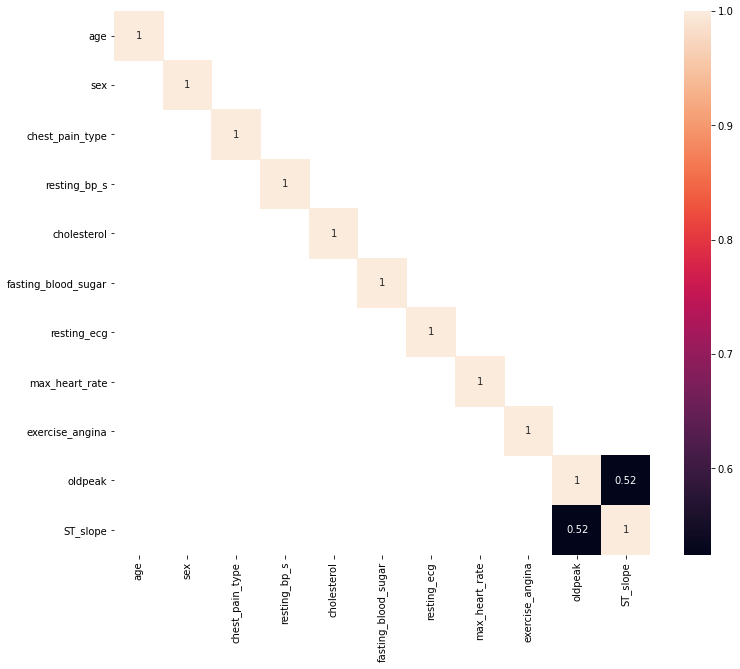

In [18]:
X=X[['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol', 'fasting_blood_sugar',
                    'resting_ecg', 'max_heart_rate', 'exercise_angina', 'oldpeak', 'ST_slope']]
plt.figure(figsize=(12,10))
sns.heatmap(X.corr()[(X.corr()>0.5) | (X.corr()<(-0.5))], annot = X.corr().round(2))

Variables <b>oldpeak</b> and <b>ST_slope</b> are correlated, but this correlation is not strong enough to drop one of them.

In [19]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'ST_slope', 'target'],
      dtype='object')

In [20]:
df=df[['chest_pain_type', 'cholesterol', 'max_heart_rate', 
       'exercise_angina', 'oldpeak', 'ST_slope', 'target']]

In [21]:
df.columns

Index(['chest_pain_type', 'cholesterol', 'max_heart_rate', 'exercise_angina',
       'oldpeak', 'ST_slope', 'target'],
      dtype='object')

In [22]:
categorical = ["chest_pain_type",'exercise_angina', "ST_slope", 'target']
numerical = ['cholesterol', 'max_heart_rate','oldpeak']

for col in categorical:
    df[col] = df[col].astype('object')

categorical = pd.get_dummies(df[categorical], drop_first=True)

df = pd.concat([df[numerical], categorical], axis=1)
df

,cholesterol,max_heart_rate,oldpeak,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,exercise_angina_1,ST_slope_1,ST_slope_2,ST_slope_3,target_1
0,0.479270,0.788732,0.295455,1,0,0,0,1,0,0,0
1,0.298507,0.676056,0.409091,0,1,0,0,0,1,0,1
2,0.469320,0.267606,0.295455,1,0,0,0,1,0,0,0
3,0.354892,0.338028,0.465909,0,0,1,1,0,1,0,1
4,0.323383,0.436620,0.295455,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1185,0.437811,0.507042,0.431818,0,0,0,0,0,1,0,1
1186,0.320066,0.570423,0.681818,0,0,1,0,0,1,0,1
1187,0.217247,0.387324,0.431818,0,0,1,1,0,1,0,1
1188,0.391376,0.802817,0.295455,1,0,0,0,0,1,0,1


In [23]:
round(df.describe(),2)

,cholesterol,max_heart_rate,oldpeak,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,exercise_angina_1,ST_slope_1,ST_slope_2,ST_slope_3,target_1
count,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00
mean,0.35,0.56,0.40,0.18,0.24,0.53,0.39,0.44,0.49,0.07,0.53
std,0.17,0.18,0.12,0.39,0.43,0.50,0.49,0.50,0.50,0.25,0.50
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.31,0.43,0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.38,0.57,0.36,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
75%,0.45,0.70,0.48,0.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [24]:
df.columns

Index(['cholesterol', 'max_heart_rate', 'oldpeak', 'chest_pain_type_2',
       'chest_pain_type_3', 'chest_pain_type_4', 'exercise_angina_1',
       'ST_slope_1', 'ST_slope_2', 'ST_slope_3', 'target_1'],
      dtype='object')

In [25]:
df.columns = ['cholesterol', 'max_heart_rate', 'oldpeak',
       'chest_pain_type_2', 'chest_pain_type_3',
       'chest_pain_type_4', 'exercise_angina', 'ST_slope_1', 'ST_slope_2',
       'ST_slope_3', 'target']

In [26]:
X=df[['cholesterol', 'max_heart_rate', 'oldpeak',
       'chest_pain_type_2', 'chest_pain_type_3',
       'chest_pain_type_4', 'exercise_angina', 'ST_slope_1', 'ST_slope_2',
       'ST_slope_3']]
y=df['target']

## Cross validation and model selection

We will create test data to check in the end final performance of our model.

In [27]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(0,10000))

# Logistic Regression

In [29]:
parameters = {
    'tol':[0.01, 0.001, 0.0001],
    'C':[0.001, 0.01, 0.1, 1, 2, 5]
}

logreg = LogisticRegression()
gs1 = GridSearchCV(logreg, parameters, cv = 10, return_train_score = True)

gs1.fit(X_train, y_train)


res1 = pd.DataFrame(gs1.cv_results_)[['params','mean_train_score','mean_test_score', 'rank_test_score']]
res1['dif'] = res1['mean_train_score'] - res1['mean_test_score']

res1 = res1.sort_values('rank_test_score')
res1.columns = ['params', 'mean_train_score', 'mean_val_score', 'rank', 'dif']
res1.head(10)

,params,mean_train_score,mean_val_score,rank,dif
14,"{'C': 2, 'tol': 0.0001}",0.844655,0.842445,1,0.002209
13,"{'C': 2, 'tol': 0.001}",0.844655,0.842445,1,0.002209
12,"{'C': 2, 'tol': 0.01}",0.844655,0.842445,1,0.002209
9,"{'C': 1, 'tol': 0.01}",0.844888,0.840362,4,0.004526
10,"{'C': 1, 'tol': 0.001}",0.844888,0.840362,4,0.004526
11,"{'C': 1, 'tol': 0.0001}",0.844888,0.840362,4,0.004526
17,"{'C': 5, 'tol': 0.0001}",0.840569,0.838235,7,0.002334
15,"{'C': 5, 'tol': 0.01}",0.840803,0.838235,7,0.002568
16,"{'C': 5, 'tol': 0.001}",0.840569,0.838235,7,0.002334
3,"{'C': 0.01, 'tol': 0.01}",0.833333,0.828805,10,0.004529


# Ridge

In [30]:
parameters = {
    'tol':[0.01, 0.001, 0.0001],
    'alpha':[0.1, 0.2, 0.5, 1]
}

ridge = RidgeClassifier()
gs2 = GridSearchCV(ridge, parameters, cv = 10, return_train_score = True)

gs2.fit(X_train, y_train)


res2 = pd.DataFrame(gs2.cv_results_)[['params','mean_train_score','mean_test_score', 'rank_test_score']]
res2['dif'] = res2['mean_train_score'] - res2['mean_test_score']

res2 = res2.sort_values('rank_test_score')
res2.columns = ['params', 'mean_train_score', 'mean_val_score', 'rank', 'dif']
res2.head(10)

,params,mean_train_score,mean_val_score,rank,dif
9,"{'alpha': 1, 'tol': 0.01}",0.839052,0.838257,1,0.000795
10,"{'alpha': 1, 'tol': 0.001}",0.839052,0.838257,1,0.000795
11,"{'alpha': 1, 'tol': 0.0001}",0.839052,0.838257,1,0.000795
0,"{'alpha': 0.1, 'tol': 0.01}",0.838235,0.834046,4,0.004189
1,"{'alpha': 0.1, 'tol': 0.001}",0.838235,0.834046,4,0.004189
2,"{'alpha': 0.1, 'tol': 0.0001}",0.838235,0.834046,4,0.004189
3,"{'alpha': 0.2, 'tol': 0.01}",0.838585,0.834046,4,0.004539
4,"{'alpha': 0.2, 'tol': 0.001}",0.838585,0.834046,4,0.004539
5,"{'alpha': 0.2, 'tol': 0.0001}",0.838585,0.834046,4,0.004539
6,"{'alpha': 0.5, 'tol': 0.01}",0.838818,0.834046,4,0.004772


# KNN
We have 2 classes so K should be an odd number.

In [31]:
parameters = {
    'n_neighbors':[11,21,31,41,51,61],
    'weights':['uniform', 'distance'],
    'p':[1,2]
}

knn = KNeighborsClassifier()
gs3 = GridSearchCV(knn, parameters, cv = 10, return_train_score = True)

gs3.fit(X_train, y_train)


res3 = pd.DataFrame(gs3.cv_results_)[['params','mean_train_score','mean_test_score', 'rank_test_score']]
res3['dif'] = res3['mean_train_score'] - res3['mean_test_score']

res3 = res3.sort_values('rank_test_score')
res3.columns = ['params', 'mean_train_score', 'mean_val_score', 'rank', 'dif']
res3.head(10)

,params,mean_train_score,mean_val_score,rank,dif
1,"{'n_neighbors': 11, 'p': 1, 'weights': 'distance'}",0.999067,0.904364,1,0.094702
11,"{'n_neighbors': 31, 'p': 2, 'weights': 'distance'}",0.999067,0.903344,2,0.095722
7,"{'n_neighbors': 21, 'p': 2, 'weights': 'distance'}",0.999067,0.902292,3,0.096775
5,"{'n_neighbors': 21, 'p': 1, 'weights': 'distance'}",0.999067,0.901228,4,0.097838
9,"{'n_neighbors': 31, 'p': 1, 'weights': 'distance'}",0.999067,0.901217,5,0.097849
23,"{'n_neighbors': 61, 'p': 2, 'weights': 'distance'}",0.999067,0.900186,6,0.098880
13,"{'n_neighbors': 41, 'p': 1, 'weights': 'distance'}",0.999067,0.899145,7,0.099922
3,"{'n_neighbors': 11, 'p': 2, 'weights': 'distance'}",0.999067,0.899123,8,0.099944
19,"{'n_neighbors': 51, 'p': 2, 'weights': 'distance'}",0.999067,0.898092,9,0.100974
17,"{'n_neighbors': 51, 'p': 1, 'weights': 'distance'}",0.999067,0.898092,9,0.100974


# Support Vector Machine

In [32]:
import warnings
warnings.filterwarnings('ignore')
parameters = {
    'tol':[0.01, 0.001, 0.0001],
    'C':[0.001, 0.01, 0.1, 1, 2, 5],
    'max_iter':[2000]
}

svc = SVC()
gs4 = GridSearchCV(svc, parameters, cv = 10, return_train_score = True)

gs4.fit(X_train, y_train)


res4 = pd.DataFrame(gs4.cv_results_)[['params','mean_train_score','mean_test_score', 'rank_test_score']]
res4['dif'] = res4['mean_train_score'] - res4['mean_test_score']

res4 = res4.sort_values('rank_test_score')
res4.columns = ['params', 'mean_train_score', 'mean_val_score', 'rank', 'dif']
res4.head(10)

,params,mean_train_score,mean_val_score,rank,dif
17,"{'C': 5, 'max_iter': 2000, 'tol': 0.0001}",0.857258,0.840373,1,0.016886
15,"{'C': 5, 'max_iter': 2000, 'tol': 0.01}",0.857258,0.840373,1,0.016886
16,"{'C': 5, 'max_iter': 2000, 'tol': 0.001}",0.857258,0.840373,1,0.016886
14,"{'C': 2, 'max_iter': 2000, 'tol': 0.0001}",0.846523,0.822478,4,0.024045
3,"{'C': 0.01, 'max_iter': 2000, 'tol': 0.01}",0.831932,0.822478,4,0.009454
4,"{'C': 0.01, 'max_iter': 2000, 'tol': 0.001}",0.831349,0.822478,4,0.008871
5,"{'C': 0.01, 'max_iter': 2000, 'tol': 0.0001}",0.831582,0.822478,4,0.009104
13,"{'C': 2, 'max_iter': 2000, 'tol': 0.001}",0.846523,0.822478,4,0.024045
12,"{'C': 2, 'max_iter': 2000, 'tol': 0.01}",0.846523,0.821425,9,0.025097
9,"{'C': 1, 'max_iter': 2000, 'tol': 0.01}",0.833567,0.815099,10,0.018469


# Random Forest

In [33]:
parameters = {
    'n_estimators':[200,300],
    'max_depth':[4,5,6,7,8]
}

rfc = RandomForestClassifier()
gs5 = GridSearchCV(rfc, parameters, cv = 10, return_train_score = True)

gs5.fit(X_train, y_train)


res5 = pd.DataFrame(gs5.cv_results_)[['params','mean_train_score','mean_test_score', 'rank_test_score']]
res5['dif'] = res5['mean_train_score'] - res5['mean_test_score']

res5 = res5.sort_values('rank_test_score')
res5.columns = ['params', 'mean_train_score', 'mean_val_score', 'rank', 'dif']
res5.head(10)

,params,mean_train_score,mean_val_score,rank,dif
9,"{'max_depth': 8, 'n_estimators': 300}",0.961600,0.882336,1,0.079265
8,"{'max_depth': 8, 'n_estimators': 200}",0.960084,0.881272,2,0.078813
7,"{'max_depth': 7, 'n_estimators': 300}",0.934290,0.867599,3,0.066691
6,"{'max_depth': 7, 'n_estimators': 200}",0.935924,0.862357,4,0.073566
4,"{'max_depth': 6, 'n_estimators': 200}",0.910013,0.855022,5,0.054991
5,"{'max_depth': 6, 'n_estimators': 300}",0.909896,0.854002,6,0.055893
3,"{'max_depth': 5, 'n_estimators': 300}",0.882703,0.851908,7,0.030795
2,"{'max_depth': 5, 'n_estimators': 200}",0.883053,0.848761,8,0.034292
0,"{'max_depth': 4, 'n_estimators': 200}",0.865546,0.843520,9,0.022027
1,"{'max_depth': 4, 'n_estimators': 300}",0.866830,0.841414,10,0.025416


# XGBoost

In [34]:
parameters = {
    'n_estimators':[200,300],
    'max_depth':[4,5,6,7,8],
    'learning_rate':[0.001,0.01,0.1]
}

xgb = XGBClassifier()
gs6 = GridSearchCV(xgb, parameters, cv = 10, return_train_score = True)

gs6.fit(X_train, y_train)


res6 = pd.DataFrame(gs6.cv_results_)[['params','mean_train_score','mean_test_score', 'rank_test_score']]
res6['dif'] = res6['mean_train_score'] - res6['mean_test_score']

res6 = res6.sort_values('rank_test_score')
res6.columns = ['params', 'mean_train_score', 'mean_val_score', 'rank', 'dif']
res6.head(10)

,params,mean_train_score,mean_val_score,rank,dif
26,"{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}",0.997783,0.914890,1,0.082892
23,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}",0.995332,0.913838,2,0.081494
27,"{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}",0.998483,0.911743,3,0.086740
25,"{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300}",0.998366,0.911721,4,0.086645
28,"{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200}",0.997899,0.910680,5,0.087220
22,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}",0.986928,0.908596,6,0.078331
29,"{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 300}",0.998600,0.908575,7,0.090025
24,"{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}",0.994515,0.904375,8,0.090140
21,"{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}",0.986111,0.903333,9,0.082777
20,"{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}",0.970238,0.894923,10,0.075315


# Deep Neural Network

In [35]:
import tensorflow.keras as keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [36]:
def build_model(architecture, depth):
    if architecture == 1:
        d1 = 32; d2 = 32; d3 = 32; d4 = 32
    elif architecture == 2:
        d1 = 32; d2 = 16; d3 = 16; d4 = 8
    elif architecture == 3:
        d1 = 16;d2 = 16; d3 = 8; d4 = 8

    model = keras.models.Sequential()
    
    model.add(keras.layers.Dense(d1, input_dim=10, activation='relu'))
    model.add(keras.layers.Dense(d2, activation='relu'))
    if depth >=3:
        model.add(keras.layers.Dense(d3, activation='relu'))
    if depth >= 4:
        model.add(keras.layers.Dense(d4, activation='relu'))
    
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [37]:
param_grid = dict(architecture=[1,2,3],
                  depth = [2,3,4])


nn = KerasClassifier(build_fn=build_model, epochs=80, batch_size=32)

gs7 = GridSearchCV(estimator=nn, param_grid=param_grid, cv = 10, verbose=1,return_train_score=True)

gs7.fit(X_train, y_train)

res7 = pd.DataFrame(gs7.cv_results_)[['params','mean_train_score','mean_test_score', 'rank_test_score']]
res7['dif'] = res7['mean_train_score'] - res7['mean_test_score']

res7 = res7.sort_values('rank_test_score')
res7.to_csv('res6.csv')
res7.head(10)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/80
27/27 [==============================] - 0s 934us/step - loss: 0.6222 - accuracy: 0.7138
Epoch 2/80
27/27 [==============================] - 0s 1ms/step - loss: 0.5049 - accuracy: 0.8119
Epoch 3/80
27/27 [==============================] - 0s 4ms/step - loss: 0.4298 - accuracy: 0.8236
Epoch 4/80
27/27 [==============================] - 0s 4ms/step - loss: 0.4011 - accuracy: 0.8329
Epoch 5/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3932 - accuracy: 0.8329
Epoch 6/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.8306
Epoch 7/80
27/27 [==============================] - 0s 5ms/step - loss: 0.3884 - accuracy: 0.8341
Epoch 8/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.8294
Epoch 9/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3867 - accuracy: 0.8318
Epoch 10/80
27/27 [==============================] - 0s 5ms/step - loss: 0.3836 - accuracy: 0.8400
Epoch 11/80
27/27

27/27 [==============================] - 0s 3ms/step - loss: 0.4887 - accuracy: 0.8271
Epoch 3/80
27/27 [==============================] - 0s 757us/step - loss: 0.4405 - accuracy: 0.8283
Epoch 4/80
27/27 [==============================] - 0s 2ms/step - loss: 0.4223 - accuracy: 0.8283
Epoch 5/80
27/27 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8294
Epoch 6/80
27/27 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8283
Epoch 7/80
27/27 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8353
Epoch 8/80
27/27 [==============================] - 0s 3ms/step - loss: 0.4085 - accuracy: 0.8318
Epoch 9/80
27/27 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8318
Epoch 10/80
27/27 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8364
Epoch 11/80
27/27 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.8329
Epoch 12/80
27/27 [========

27/27 [==============================] - 0s 2ms/step - loss: 0.4423 - accuracy: 0.8308
Epoch 4/80
27/27 [==============================] - 0s 3ms/step - loss: 0.4149 - accuracy: 0.8261
Epoch 5/80
27/27 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.8320
Epoch 6/80
27/27 [==============================] - 0s 3ms/step - loss: 0.4063 - accuracy: 0.8355
Epoch 7/80
27/27 [==============================] - 0s 2ms/step - loss: 0.4034 - accuracy: 0.8296
Epoch 8/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3997 - accuracy: 0.8366
Epoch 9/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8343
Epoch 10/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.8366
Epoch 11/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3932 - accuracy: 0.8378
Epoch 12/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.8425
Epoch 13/80
27/27 [=========

27/27 [==============================] - 0s 2ms/step - loss: 0.4041 - accuracy: 0.8250
Epoch 6/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3915 - accuracy: 0.8448
Epoch 7/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3852 - accuracy: 0.8390
Epoch 8/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3813 - accuracy: 0.8506
Epoch 9/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3780 - accuracy: 0.8401
Epoch 10/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3802 - accuracy: 0.8506
Epoch 11/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3723 - accuracy: 0.8541
Epoch 12/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3688 - accuracy: 0.8541
Epoch 13/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3685 - accuracy: 0.8565
Epoch 14/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3652 - accuracy: 0.8553
Epoch 15/80
27/27 [=======

27/27 [==============================] - 0s 3ms/step - loss: 0.4115 - accuracy: 0.8296
Epoch 8/80
27/27 [==============================] - 0s 1ms/step - loss: 0.4063 - accuracy: 0.8261
Epoch 9/80
27/27 [==============================] - 0s 2ms/step - loss: 0.4045 - accuracy: 0.8366
Epoch 10/80
27/27 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8308
Epoch 11/80
27/27 [==============================] - 0s 2ms/step - loss: 0.4001 - accuracy: 0.8320
Epoch 12/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3977 - accuracy: 0.8296
Epoch 13/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3958 - accuracy: 0.8390
Epoch 14/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.8273
Epoch 15/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3931 - accuracy: 0.8413
Epoch 16/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3908 - accuracy: 0.8296
Epoch 17/80
27/27 [=====

27/27 [==============================] - 0s 2ms/step - loss: 0.3861 - accuracy: 0.8355
Epoch 10/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3845 - accuracy: 0.8483
Epoch 11/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3822 - accuracy: 0.8460
Epoch 12/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3809 - accuracy: 0.8460
Epoch 13/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3807 - accuracy: 0.8436
Epoch 14/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3798 - accuracy: 0.8483
Epoch 15/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3769 - accuracy: 0.8483
Epoch 16/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3754 - accuracy: 0.8495
Epoch 17/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3743 - accuracy: 0.8506
Epoch 18/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3734 - accuracy: 0.8471
Epoch 19/80
27/27 [===

27/27 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.8493
Epoch 12/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3905 - accuracy: 0.8400
Epoch 13/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3937 - accuracy: 0.8364
Epoch 14/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3863 - accuracy: 0.8446
Epoch 15/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3856 - accuracy: 0.8493
Epoch 16/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.8458
Epoch 17/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3805 - accuracy: 0.8446
Epoch 18/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3825 - accuracy: 0.8528
Epoch 19/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3801 - accuracy: 0.8481
Epoch 20/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3778 - accuracy: 0.8470
Epoch 21/80
27/27 [===

27/27 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8448
Epoch 13/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3854 - accuracy: 0.8471
Epoch 14/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3843 - accuracy: 0.8448
Epoch 15/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3817 - accuracy: 0.8448
Epoch 16/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3769 - accuracy: 0.8425
Epoch 17/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3790 - accuracy: 0.8425
Epoch 18/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3757 - accuracy: 0.8460
Epoch 19/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3722 - accuracy: 0.8506
Epoch 20/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3712 - accuracy: 0.8495
Epoch 21/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3705 - accuracy: 0.8471
Epoch 22/80
27/27 [===

27/27 [==============================] - 0s 3ms/step - loss: 0.3708 - accuracy: 0.8600
Epoch 14/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3684 - accuracy: 0.8588
Epoch 15/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3641 - accuracy: 0.8588
Epoch 16/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3624 - accuracy: 0.8611
Epoch 17/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3625 - accuracy: 0.8553
Epoch 18/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3596 - accuracy: 0.8576
Epoch 19/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3581 - accuracy: 0.8588
Epoch 20/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3580 - accuracy: 0.8565
Epoch 21/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3600 - accuracy: 0.8576
Epoch 22/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3572 - accuracy: 0.8530
Epoch 23/80
27/27 [===

27/27 [==============================] - 0s 2ms/step - loss: 0.3749 - accuracy: 0.8448
Epoch 16/80
27/27 [==============================] - 0s 1ms/step - loss: 0.3757 - accuracy: 0.8425
Epoch 17/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3724 - accuracy: 0.8518
Epoch 18/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3719 - accuracy: 0.8483
Epoch 19/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3692 - accuracy: 0.8483
Epoch 20/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3685 - accuracy: 0.8471
Epoch 21/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3679 - accuracy: 0.8483
Epoch 22/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3630 - accuracy: 0.8495
Epoch 23/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3623 - accuracy: 0.8495
Epoch 24/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3642 - accuracy: 0.8471
Epoch 25/80
27/27 [===

27/27 [==============================] - 0s 3ms/step - loss: 0.3719 - accuracy: 0.8506
Epoch 18/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3761 - accuracy: 0.8436
Epoch 19/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3721 - accuracy: 0.8448
Epoch 20/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3708 - accuracy: 0.8495
Epoch 21/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3679 - accuracy: 0.8518
Epoch 22/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3656 - accuracy: 0.8506
Epoch 23/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3650 - accuracy: 0.8448
Epoch 24/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3639 - accuracy: 0.8471
Epoch 25/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3647 - accuracy: 0.8495
Epoch 26/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3637 - accuracy: 0.8518
Epoch 27/80
27/27 [===

27/27 [==============================] - 0s 3ms/step - loss: 0.3806 - accuracy: 0.8493
Epoch 20/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3815 - accuracy: 0.8528
Epoch 21/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3789 - accuracy: 0.8505
Epoch 22/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3763 - accuracy: 0.8493
Epoch 23/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3742 - accuracy: 0.8540
Epoch 24/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3721 - accuracy: 0.8458
Epoch 25/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3708 - accuracy: 0.8551
Epoch 26/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3729 - accuracy: 0.8423
Epoch 27/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3692 - accuracy: 0.8528
Epoch 28/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3694 - accuracy: 0.8516
Epoch 29/80
27/27 [===

27/27 [==============================] - 0s 2ms/step - loss: 0.3749 - accuracy: 0.8436
Epoch 22/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.8425
Epoch 23/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3674 - accuracy: 0.8436
Epoch 24/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3725 - accuracy: 0.8366
Epoch 25/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3633 - accuracy: 0.8483
Epoch 26/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3636 - accuracy: 0.8530
Epoch 27/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3658 - accuracy: 0.8506
Epoch 28/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3649 - accuracy: 0.8448
Epoch 29/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3566 - accuracy: 0.8460
Epoch 30/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3539 - accuracy: 0.8506
Epoch 31/80
27/27 [===

27/27 [==============================] - 0s 3ms/step - loss: 0.3452 - accuracy: 0.8588
Epoch 24/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3426 - accuracy: 0.8646
Epoch 25/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3422 - accuracy: 0.8670
Epoch 26/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3403 - accuracy: 0.8635
Epoch 27/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3380 - accuracy: 0.8681
Epoch 28/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3383 - accuracy: 0.8681
Epoch 29/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3340 - accuracy: 0.8681
Epoch 30/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3309 - accuracy: 0.8681
Epoch 31/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3306 - accuracy: 0.8740
Epoch 32/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8623
Epoch 33/80
27/27 [===

27/27 [==============================] - 0s 3ms/step - loss: 0.3557 - accuracy: 0.8495
Epoch 26/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8448
Epoch 27/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3587 - accuracy: 0.8495
Epoch 28/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3473 - accuracy: 0.8530
Epoch 29/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3487 - accuracy: 0.8576
Epoch 30/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3468 - accuracy: 0.8600
Epoch 31/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3483 - accuracy: 0.8530
Epoch 32/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3446 - accuracy: 0.8600
Epoch 33/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3445 - accuracy: 0.8553
Epoch 34/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3439 - accuracy: 0.8588
Epoch 35/80
27/27 [===

27/27 [==============================] - 0s 1ms/step - loss: 0.3431 - accuracy: 0.8541
Epoch 28/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3399 - accuracy: 0.8565
Epoch 29/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3421 - accuracy: 0.8530
Epoch 30/80
27/27 [==============================] - 0s 1ms/step - loss: 0.3389 - accuracy: 0.8611
Epoch 31/80
27/27 [==============================] - 0s 1ms/step - loss: 0.3400 - accuracy: 0.8553
Epoch 32/80
27/27 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.8553
Epoch 33/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3366 - accuracy: 0.8600
Epoch 34/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3336 - accuracy: 0.8635
Epoch 35/80
27/27 [==============================] - 0s 1ms/step - loss: 0.3361 - accuracy: 0.8565
Epoch 36/80
27/27 [==============================] - 0s 1ms/step - loss: 0.3342 - accuracy: 0.8588
Epoch 37/80
27/27 [===

27/27 [==============================] - 0s 923us/step - loss: 0.3857 - accuracy: 0.8481
Epoch 30/80
27/27 [==============================] - 0s 1ms/step - loss: 0.3862 - accuracy: 0.8446
Epoch 31/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3871 - accuracy: 0.8458
Epoch 32/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3860 - accuracy: 0.8423
Epoch 33/80
27/27 [==============================] - 0s 1ms/step - loss: 0.3834 - accuracy: 0.8470
Epoch 34/80
27/27 [==============================] - 0s 1ms/step - loss: 0.3822 - accuracy: 0.8516
Epoch 35/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.8470
Epoch 36/80
27/27 [==============================] - 0s 1ms/step - loss: 0.3806 - accuracy: 0.8493
Epoch 37/80
27/27 [==============================] - 0s 1ms/step - loss: 0.3806 - accuracy: 0.8505
Epoch 38/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3794 - accuracy: 0.8458
Epoch 39/80
27/27 [=

27/27 [==============================] - 0s 1ms/step - loss: 0.3785 - accuracy: 0.8483
Epoch 32/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3770 - accuracy: 0.8483
Epoch 33/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3769 - accuracy: 0.8471
Epoch 34/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3761 - accuracy: 0.8460
Epoch 35/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3760 - accuracy: 0.8471
Epoch 36/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3748 - accuracy: 0.8413
Epoch 37/80
27/27 [==============================] - 0s 1ms/step - loss: 0.3742 - accuracy: 0.8495
Epoch 38/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.8448
Epoch 39/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3730 - accuracy: 0.8448
Epoch 40/80
27/27 [==============================] - 0s 1ms/step - loss: 0.3735 - accuracy: 0.8471
Epoch 41/80
27/27 [===

27/27 [==============================] - 0s 3ms/step - loss: 0.3547 - accuracy: 0.8576
Epoch 34/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3528 - accuracy: 0.8646
Epoch 35/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.8588
Epoch 36/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3504 - accuracy: 0.8611
Epoch 37/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.8611
Epoch 38/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3501 - accuracy: 0.8611
Epoch 39/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8658
Epoch 40/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3482 - accuracy: 0.8611
Epoch 41/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3472 - accuracy: 0.8646
Epoch 42/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3483 - accuracy: 0.8635
Epoch 43/80
27/27 [===

27/27 [==============================] - 0s 2ms/step - loss: 0.3762 - accuracy: 0.8448
Epoch 36/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3743 - accuracy: 0.8483
Epoch 37/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.8506
Epoch 38/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.8436
Epoch 39/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.8448
Epoch 40/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3730 - accuracy: 0.8471
Epoch 41/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3732 - accuracy: 0.8506
Epoch 42/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3733 - accuracy: 0.8460
Epoch 43/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3720 - accuracy: 0.8436
Epoch 44/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3753 - accuracy: 0.8436
Epoch 45/80
27/27 [===

27/27 [==============================] - 0s 2ms/step - loss: 0.3671 - accuracy: 0.8495
Epoch 38/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3652 - accuracy: 0.8506
Epoch 39/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3646 - accuracy: 0.8518
Epoch 40/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3644 - accuracy: 0.8495
Epoch 41/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3648 - accuracy: 0.8471
Epoch 42/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3635 - accuracy: 0.8506
Epoch 43/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3628 - accuracy: 0.8495
Epoch 44/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3604 - accuracy: 0.8506
Epoch 45/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3594 - accuracy: 0.8553
Epoch 46/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3588 - accuracy: 0.8518
Epoch 47/80
27/27 [===

27/27 [==============================] - 0s 3ms/step - loss: 0.3737 - accuracy: 0.8458
Epoch 40/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3722 - accuracy: 0.8470
Epoch 41/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3724 - accuracy: 0.8528
Epoch 42/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3710 - accuracy: 0.8493
Epoch 43/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3707 - accuracy: 0.8470
Epoch 44/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3694 - accuracy: 0.8516
Epoch 45/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3708 - accuracy: 0.8470
Epoch 46/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3704 - accuracy: 0.8481
Epoch 47/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3672 - accuracy: 0.8505
Epoch 48/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3679 - accuracy: 0.8516
Epoch 49/80
27/27 [===

27/27 [==============================] - 0s 3ms/step - loss: 0.3636 - accuracy: 0.8495
Epoch 42/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3605 - accuracy: 0.8506
Epoch 43/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3576 - accuracy: 0.8483
Epoch 44/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3590 - accuracy: 0.8436
Epoch 45/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3580 - accuracy: 0.8576
Epoch 46/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3561 - accuracy: 0.8495
Epoch 47/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3583 - accuracy: 0.8460
Epoch 48/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3572 - accuracy: 0.8471
Epoch 49/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3559 - accuracy: 0.8436
Epoch 50/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.8518
Epoch 51/80
27/27 [===

27/27 [==============================] - 0s 3ms/step - loss: 0.3493 - accuracy: 0.8635
Epoch 43/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3459 - accuracy: 0.8611
Epoch 44/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3430 - accuracy: 0.8681
Epoch 45/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3424 - accuracy: 0.8635
Epoch 46/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3411 - accuracy: 0.8705
Epoch 47/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3411 - accuracy: 0.8670
Epoch 48/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3407 - accuracy: 0.8658
Epoch 49/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3411 - accuracy: 0.8576
Epoch 50/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3410 - accuracy: 0.8611
Epoch 51/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3385 - accuracy: 0.8623
Epoch 52/80
27/27 [===

27/27 [==============================] - 0s 3ms/step - loss: 0.3662 - accuracy: 0.8413
Epoch 45/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3626 - accuracy: 0.8436
Epoch 46/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3622 - accuracy: 0.8448
Epoch 47/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3608 - accuracy: 0.8448
Epoch 48/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3589 - accuracy: 0.8413
Epoch 49/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3627 - accuracy: 0.8401
Epoch 50/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3588 - accuracy: 0.8448
Epoch 51/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3624 - accuracy: 0.8448
Epoch 52/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3642 - accuracy: 0.8436
Epoch 53/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3560 - accuracy: 0.8518
Epoch 54/80
27/27 [===

27/27 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8518
Epoch 47/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3612 - accuracy: 0.8518
Epoch 48/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3604 - accuracy: 0.8506
Epoch 49/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3608 - accuracy: 0.8495
Epoch 50/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3609 - accuracy: 0.8530
Epoch 51/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3591 - accuracy: 0.8553
Epoch 52/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3587 - accuracy: 0.8483
Epoch 53/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3576 - accuracy: 0.8518
Epoch 54/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3549 - accuracy: 0.8518
Epoch 55/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3563 - accuracy: 0.8471
Epoch 56/80
27/27 [===

27/27 [==============================] - 0s 3ms/step - loss: 0.3609 - accuracy: 0.8493
Epoch 49/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3615 - accuracy: 0.8493
Epoch 50/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3608 - accuracy: 0.8528
Epoch 51/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3605 - accuracy: 0.8528
Epoch 52/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3577 - accuracy: 0.8528
Epoch 53/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3592 - accuracy: 0.8540
Epoch 54/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3634 - accuracy: 0.8481
Epoch 55/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3607 - accuracy: 0.8540
Epoch 56/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3578 - accuracy: 0.8563
Epoch 57/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3630 - accuracy: 0.8563
Epoch 58/80
27/27 [===

27/27 [==============================] - 0s 3ms/step - loss: 0.3570 - accuracy: 0.8471
Epoch 51/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3570 - accuracy: 0.8530
Epoch 52/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.8460
Epoch 53/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3546 - accuracy: 0.8425
Epoch 54/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3590 - accuracy: 0.8495
Epoch 55/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3549 - accuracy: 0.8483
Epoch 56/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3562 - accuracy: 0.8436
Epoch 57/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3528 - accuracy: 0.8460
Epoch 58/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3519 - accuracy: 0.8448
Epoch 59/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3516 - accuracy: 0.8448
Epoch 60/80
27/27 [===

27/27 [==============================] - 0s 2ms/step - loss: 0.3335 - accuracy: 0.8646
Epoch 53/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3307 - accuracy: 0.8611
Epoch 54/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3334 - accuracy: 0.8623
Epoch 55/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3288 - accuracy: 0.8588
Epoch 56/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3336 - accuracy: 0.8600
Epoch 57/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3283 - accuracy: 0.8541
Epoch 58/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3290 - accuracy: 0.8600
Epoch 59/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3292 - accuracy: 0.8600
Epoch 60/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3261 - accuracy: 0.8600
Epoch 61/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3245 - accuracy: 0.8670
Epoch 62/80
27/27 [===

27/27 [==============================] - 0s 3ms/step - loss: 0.3505 - accuracy: 0.8530
Epoch 55/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3549 - accuracy: 0.8506
Epoch 56/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3502 - accuracy: 0.8518
Epoch 57/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3515 - accuracy: 0.8530
Epoch 58/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3523 - accuracy: 0.8483
Epoch 59/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3568 - accuracy: 0.8576
Epoch 60/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3482 - accuracy: 0.8541
Epoch 61/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3460 - accuracy: 0.8565
Epoch 62/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3462 - accuracy: 0.8576
Epoch 63/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3471 - accuracy: 0.8553
Epoch 64/80
27/27 [===

27/27 [==============================] - 0s 3ms/step - loss: 0.3353 - accuracy: 0.8588
Epoch 57/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3353 - accuracy: 0.8588
Epoch 58/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3360 - accuracy: 0.8565
Epoch 59/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3345 - accuracy: 0.8611
Epoch 60/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3338 - accuracy: 0.8588
Epoch 61/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3342 - accuracy: 0.8541
Epoch 62/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3306 - accuracy: 0.8541
Epoch 63/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3287 - accuracy: 0.8623
Epoch 64/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3345 - accuracy: 0.8576
Epoch 65/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3278 - accuracy: 0.8588
Epoch 66/80
27/27 [===

27/27 [==============================] - 0s 2ms/step - loss: 0.3828 - accuracy: 0.8458
Epoch 59/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3827 - accuracy: 0.8458
Epoch 60/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3828 - accuracy: 0.8481
Epoch 61/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3824 - accuracy: 0.8458
Epoch 62/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3830 - accuracy: 0.8470
Epoch 63/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3815 - accuracy: 0.8446
Epoch 64/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3814 - accuracy: 0.8470
Epoch 65/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3828 - accuracy: 0.8446
Epoch 66/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.8435
Epoch 67/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3797 - accuracy: 0.8470
Epoch 68/80
27/27 [===

27/27 [==============================] - 0s 2ms/step - loss: 0.3676 - accuracy: 0.8483
Epoch 61/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3662 - accuracy: 0.8483
Epoch 62/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3671 - accuracy: 0.8471
Epoch 63/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3672 - accuracy: 0.8483
Epoch 64/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3651 - accuracy: 0.8448
Epoch 65/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3645 - accuracy: 0.8471
Epoch 66/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3650 - accuracy: 0.8460
Epoch 67/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3651 - accuracy: 0.8460
Epoch 68/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3634 - accuracy: 0.8436
Epoch 69/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3630 - accuracy: 0.8448
Epoch 70/80
27/27 [===

27/27 [==============================] - 0s 2ms/step - loss: 0.3521 - accuracy: 0.8623
Epoch 63/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3518 - accuracy: 0.8611
Epoch 64/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3515 - accuracy: 0.8646
Epoch 65/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3517 - accuracy: 0.8611
Epoch 66/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3509 - accuracy: 0.8611
Epoch 67/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3514 - accuracy: 0.8646
Epoch 68/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3509 - accuracy: 0.8611
Epoch 69/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.8635
Epoch 70/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.8646
Epoch 71/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3491 - accuracy: 0.8623
Epoch 72/80
27/27 [===

27/27 [==============================] - 0s 3ms/step - loss: 0.3666 - accuracy: 0.8436
Epoch 64/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8518
Epoch 65/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3643 - accuracy: 0.8460
Epoch 66/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3635 - accuracy: 0.8460
Epoch 67/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3630 - accuracy: 0.8518
Epoch 68/80
27/27 [==============================] - 0s 761us/step - loss: 0.3622 - accuracy: 0.8483
Epoch 69/80
27/27 [==============================] - 0s 1ms/step - loss: 0.3616 - accuracy: 0.8530
Epoch 70/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3616 - accuracy: 0.8518
Epoch 71/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3618 - accuracy: 0.8483
Epoch 72/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8471
Epoch 73/80
27/27 [=

27/27 [==============================] - 0s 3ms/step - loss: 0.3553 - accuracy: 0.8553
Epoch 65/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3559 - accuracy: 0.8530
Epoch 66/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3537 - accuracy: 0.8506
Epoch 67/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.8541
Epoch 68/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3556 - accuracy: 0.8541
Epoch 69/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3541 - accuracy: 0.8553
Epoch 70/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3544 - accuracy: 0.8518
Epoch 71/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3526 - accuracy: 0.8541
Epoch 72/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3518 - accuracy: 0.8518
Epoch 73/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 0.8518
Epoch 74/80
27/27 [===

27/27 [==============================] - 0s 3ms/step - loss: 0.3636 - accuracy: 0.8505
Epoch 67/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3638 - accuracy: 0.8493
Epoch 68/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3623 - accuracy: 0.8516
Epoch 69/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3625 - accuracy: 0.8493
Epoch 70/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3615 - accuracy: 0.8481
Epoch 71/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3617 - accuracy: 0.8493
Epoch 72/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3626 - accuracy: 0.8481
Epoch 73/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3603 - accuracy: 0.8505
Epoch 74/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3602 - accuracy: 0.8505
Epoch 75/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3598 - accuracy: 0.8528
Epoch 76/80
27/27 [===

27/27 [==============================] - 0s 3ms/step - loss: 0.3658 - accuracy: 0.8483
Epoch 69/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3646 - accuracy: 0.8530
Epoch 70/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3651 - accuracy: 0.8471
Epoch 71/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.8471
Epoch 72/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3625 - accuracy: 0.8518
Epoch 73/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3626 - accuracy: 0.8471
Epoch 74/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3634 - accuracy: 0.8506
Epoch 75/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3614 - accuracy: 0.8495
Epoch 76/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3607 - accuracy: 0.8506
Epoch 77/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3619 - accuracy: 0.8471
Epoch 78/80
27/27 [===

27/27 [==============================] - 0s 3ms/step - loss: 0.3423 - accuracy: 0.8646
Epoch 71/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8646
Epoch 72/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3413 - accuracy: 0.8588
Epoch 73/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3405 - accuracy: 0.8600
Epoch 74/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3397 - accuracy: 0.8681
Epoch 75/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3388 - accuracy: 0.8670
Epoch 76/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3380 - accuracy: 0.8670
Epoch 77/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3377 - accuracy: 0.8681
Epoch 78/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.8693
Epoch 79/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3371 - accuracy: 0.8658
Epoch 80/80
27/27 [===

27/27 [==============================] - 0s 3ms/step - loss: 0.3430 - accuracy: 0.8541
Epoch 72/80
27/27 [==============================] - 0s 1ms/step - loss: 0.3465 - accuracy: 0.8483
Epoch 73/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3399 - accuracy: 0.8541
Epoch 74/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3388 - accuracy: 0.8576
Epoch 75/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3389 - accuracy: 0.8565
Epoch 76/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3401 - accuracy: 0.8588
Epoch 77/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3381 - accuracy: 0.8565
Epoch 78/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3382 - accuracy: 0.8553
Epoch 79/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3359 - accuracy: 0.8541
Epoch 80/80
27/27 [==============================] - 0s 938us/step - loss: 0.3386 - accuracy: 0.8588
Epoch 1/80
27/27 [==

27/27 [==============================] - 0s 3ms/step - loss: 0.3361 - accuracy: 0.8623
Epoch 74/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3402 - accuracy: 0.8600
Epoch 75/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3382 - accuracy: 0.8565
Epoch 76/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3361 - accuracy: 0.8600
Epoch 77/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.8588
Epoch 78/80
27/27 [==============================] - 0s 3ms/step - loss: 0.3367 - accuracy: 0.8635
Epoch 79/80
27/27 [==============================] - 0s 2ms/step - loss: 0.3352 - accuracy: 0.8565
Epoch 80/80
27/27 [==============================] - 0s 1ms/step - loss: 0.3313 - accuracy: 0.8635
Epoch 1/80
27/27 [==============================] - 0s 1ms/step - loss: 0.6617 - accuracy: 0.5315
Epoch 2/80
27/27 [==============================] - 0s 2ms/step - loss: 0.6150 - accuracy: 0.5935
Epoch 3/80
27/27 [======

27/27 [==============================] - 0s 789us/step - loss: 0.3629 - accuracy: 0.8540
Epoch 74/80
27/27 [==============================] - 0s 791us/step - loss: 0.3625 - accuracy: 0.8505
Epoch 75/80
27/27 [==============================] - 0s 778us/step - loss: 0.3675 - accuracy: 0.8493
Epoch 76/80
27/27 [==============================] - 0s 780us/step - loss: 0.3604 - accuracy: 0.8528
Epoch 77/80
27/27 [==============================] - 0s 777us/step - loss: 0.3588 - accuracy: 0.8481
Epoch 78/80
27/27 [==============================] - 0s 766us/step - loss: 0.3605 - accuracy: 0.8516
Epoch 79/80
27/27 [==============================] - 0s 786us/step - loss: 0.3574 - accuracy: 0.8481
Epoch 80/80
27/27 [==============================] - 0s 652us/step - loss: 0.3555 - accuracy: 0.8481
Epoch 1/80
27/27 [==============================] - 0s 853us/step - loss: 0.7026 - accuracy: 0.4831
Epoch 2/80
27/27 [==============================] - 0s 797us/step - loss: 0.6778 - accuracy: 0.4831
Epoc

27/27 [==============================] - 0s 802us/step - loss: 0.3713 - accuracy: 0.8471
Epoch 72/80
27/27 [==============================] - 0s 807us/step - loss: 0.3719 - accuracy: 0.8471
Epoch 73/80
27/27 [==============================] - 0s 805us/step - loss: 0.3727 - accuracy: 0.8483
Epoch 74/80
27/27 [==============================] - 0s 814us/step - loss: 0.3708 - accuracy: 0.8483
Epoch 75/80
27/27 [==============================] - 0s 813us/step - loss: 0.3700 - accuracy: 0.8471
Epoch 76/80
27/27 [==============================] - 0s 808us/step - loss: 0.3704 - accuracy: 0.8495
Epoch 77/80
27/27 [==============================] - 0s 803us/step - loss: 0.3698 - accuracy: 0.8483
Epoch 78/80
27/27 [==============================] - 0s 800us/step - loss: 0.3698 - accuracy: 0.8436
Epoch 79/80
27/27 [==============================] - 0s 796us/step - loss: 0.3711 - accuracy: 0.8483
Epoch 80/80
27/27 [==============================] - 0s 607us/step - loss: 0.3673 - accuracy: 0.8518
Ep

27/27 [==============================] - 0s 802us/step - loss: 0.3193 - accuracy: 0.8588
Epoch 70/80
27/27 [==============================] - 0s 796us/step - loss: 0.3199 - accuracy: 0.8681
Epoch 71/80
27/27 [==============================] - 0s 796us/step - loss: 0.3185 - accuracy: 0.8646
Epoch 72/80
27/27 [==============================] - 0s 779us/step - loss: 0.3214 - accuracy: 0.8623
Epoch 73/80
27/27 [==============================] - 0s 780us/step - loss: 0.3209 - accuracy: 0.8681
Epoch 74/80
27/27 [==============================] - 0s 774us/step - loss: 0.3198 - accuracy: 0.8611
Epoch 75/80
27/27 [==============================] - 0s 781us/step - loss: 0.3183 - accuracy: 0.8670
Epoch 76/80
27/27 [==============================] - 0s 799us/step - loss: 0.3167 - accuracy: 0.8646
Epoch 77/80
27/27 [==============================] - 0s 806us/step - loss: 0.3178 - accuracy: 0.8623
Epoch 78/80
27/27 [==============================] - 0s 798us/step - loss: 0.3173 - accuracy: 0.8635
Ep

27/27 [==============================] - 0s 789us/step - loss: 0.3560 - accuracy: 0.8518
Epoch 68/80
27/27 [==============================] - 0s 787us/step - loss: 0.3560 - accuracy: 0.8483
Epoch 69/80
27/27 [==============================] - 0s 831us/step - loss: 0.3578 - accuracy: 0.8518
Epoch 70/80
27/27 [==============================] - 0s 778us/step - loss: 0.3557 - accuracy: 0.8530
Epoch 71/80
27/27 [==============================] - 0s 799us/step - loss: 0.3533 - accuracy: 0.8553
Epoch 72/80
27/27 [==============================] - 0s 1ms/step - loss: 0.3541 - accuracy: 0.8518
Epoch 73/80
27/27 [==============================] - 0s 781us/step - loss: 0.3573 - accuracy: 0.8436
Epoch 74/80
27/27 [==============================] - 0s 781us/step - loss: 0.3536 - accuracy: 0.8506
Epoch 75/80
27/27 [==============================] - 0s 787us/step - loss: 0.3525 - accuracy: 0.8553
Epoch 76/80
27/27 [==============================] - 0s 782us/step - loss: 0.3496 - accuracy: 0.8541
Epoc

27/27 [==============================] - 0s 788us/step - loss: 0.3738 - accuracy: 0.8600
Epoch 66/80
27/27 [==============================] - 0s 777us/step - loss: 0.3743 - accuracy: 0.8635
Epoch 67/80
27/27 [==============================] - 0s 788us/step - loss: 0.3740 - accuracy: 0.8588
Epoch 68/80
27/27 [==============================] - 0s 787us/step - loss: 0.3704 - accuracy: 0.8588
Epoch 69/80
27/27 [==============================] - 0s 790us/step - loss: 0.3688 - accuracy: 0.8600
Epoch 70/80
27/27 [==============================] - 0s 796us/step - loss: 0.3681 - accuracy: 0.8635
Epoch 71/80
27/27 [==============================] - 0s 797us/step - loss: 0.3667 - accuracy: 0.8588
Epoch 72/80
27/27 [==============================] - 0s 793us/step - loss: 0.3633 - accuracy: 0.8611
Epoch 73/80
27/27 [==============================] - 0s 783us/step - loss: 0.3633 - accuracy: 0.8623
Epoch 74/80
27/27 [==============================] - 0s 798us/step - loss: 0.3616 - accuracy: 0.8600
Ep

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  9.1min finished


30/30 [==============================] - 0s 786us/step - loss: 0.6652 - accuracy: 0.6901
Epoch 2/80
30/30 [==============================] - 0s 739us/step - loss: 0.6095 - accuracy: 0.8214
Epoch 3/80
30/30 [==============================] - 0s 715us/step - loss: 0.5465 - accuracy: 0.8214
Epoch 4/80
30/30 [==============================] - 0s 711us/step - loss: 0.4809 - accuracy: 0.8246
Epoch 5/80
30/30 [==============================] - 0s 716us/step - loss: 0.4349 - accuracy: 0.8172
Epoch 6/80
30/30 [==============================] - 0s 719us/step - loss: 0.4172 - accuracy: 0.8256
Epoch 7/80
30/30 [==============================] - 0s 727us/step - loss: 0.4083 - accuracy: 0.8298
Epoch 8/80
30/30 [==============================] - 0s 728us/step - loss: 0.4047 - accuracy: 0.8319
Epoch 9/80
30/30 [==============================] - 0s 711us/step - loss: 0.4029 - accuracy: 0.8351
Epoch 10/80
30/30 [==============================] - 0s 702us/step - loss: 0.4020 - accuracy: 0.8298
Epoch 11/8

,params,mean_train_score,mean_test_score,rank_test_score,dif
6,"{'architecture': 3, 'depth': 2}",0.849673,0.844529,1,0.005144
8,"{'architecture': 3, 'depth': 4}",0.855626,0.842445,2,0.013181
3,"{'architecture': 2, 'depth': 2}",0.853291,0.840329,3,0.012962
0,"{'architecture': 1, 'depth': 2}",0.855625,0.839287,4,0.016337
7,"{'architecture': 3, 'depth': 3}",0.854342,0.836118,5,0.018223
5,"{'architecture': 2, 'depth': 4}",0.860995,0.833991,6,0.027003
2,"{'architecture': 1, 'depth': 4}",0.872198,0.831941,7,0.040257
4,"{'architecture': 2, 'depth': 3}",0.857843,0.830855,8,0.026988
1,"{'architecture': 1, 'depth': 3}",0.866130,0.824572,9,0.041557


## Conclusions

Among presented algorithms XGBoost seems to work the best despite it is overfitting.

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

model = XGBClassifier(learning_rate = 0.1, max_depth = 7, n_estimators = 200)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))
print("\nROC_AUC score: ", roc_auc_score(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       130
           1       0.91      0.94      0.92       108

    accuracy                           0.93       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.93      0.93      0.93       238

[[120  10]
 [  7 101]]

ROC_AUC score:  0.9291310541310542


As we can see our model is pretty good, it correctly assigned most of the patients. We know that our model is overfitting, but it is still the best one. It seems like that model deals better with test data. It might be because the test data is easier to classify but it is not necessarily true.